In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import cv2
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D, MaxPool2D, Dropout
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
directory = 'training_set/training_set' # the folder that u place the training data
label = ['cats', 'dogs'] # sub folder inside you training data folder
scale = 70

# train_data =[]

# def making_data():
#     for cate in label:
#         path = os.path.join(directory, cate) # example result is 'drive/My Drive/Colab Notebooks/data_set/dogsvscats/training_set/training_set/cats'
#         label_num = label.index(cate)
#         for li in os.listdir(path):
#             file = cv2.imread(os.path.join(path, li), cv2.IMREAD_GRAYSCALE)
#             file = cv2.resize(file, (scale, scale))
#             train_data.append([file, label_num])

# making_data()


i use pickle for making data more faster because in google colab it's so long to read data from google drive

In [ ]:
import pickle

train_data = pickle.load(open('pick.data', 'rb'))

In [ ]:
# import random

# random.shuffle(train_data)

In [ ]:
the_feature = []
the_label = []

for feature, label in train_data:
    the_feature.append(feature)
    the_label.append(label)

the_feature = np.array(the_feature).reshape(-1,scale, scale, 1)
the_label = np.array(the_label)

the_feature = the_feature/255.0

This is my model, the topology like picture bellow

In [ ]:
model = Sequential()

model.add(Convolution2D(64, (3,3), input_shape=the_feature.shape[1::], activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Dense(1, activation='sigmoid'))


model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

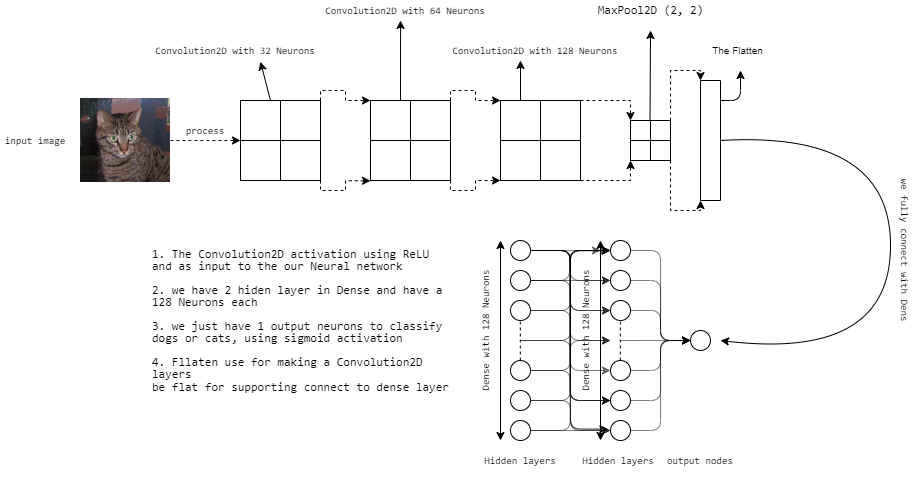

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 68, 68, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 32768)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)              

In [ ]:
import pickle

xx = pickle.load(open('/content/testx.pick', 'rb'))
yy = pickle.load(open('/content/testy.pick', 'rb'))

In [ ]:
model.fit(
    the_feature,
    the_label,
    epochs=126,
    batch_size=128,
    validation_data = (xx, yy)
)


Epoch 1/126
16/16 [==============================] - 1s 50ms/step - loss: 0.8512 - accuracy: 0.5110 - val_loss: 6.2170 - val_accuracy: 0.5415
Epoch 2/126
16/16 [==============================] - 1s 38ms/step - loss: 0.6784 - accuracy: 0.5595 - val_loss: 21.7036 - val_accuracy: 0.5570
Epoch 3/126
16/16 [==============================] - 1s 39ms/step - loss: 0.6549 - accuracy: 0.6155 - val_loss: 23.8480 - val_accuracy: 0.5860
Epoch 4/126
16/16 [==============================] - 1s 39ms/step - loss: 0.6221 - accuracy: 0.6540 - val_loss: 80.7700 - val_accuracy: 0.5400
Epoch 5/126
16/16 [==============================] - 1s 38ms/step - loss: 0.5980 - accuracy: 0.6770 - val_loss: 29.1016 - val_accuracy: 0.6055
Epoch 6/126
16/16 [==============================] - 1s 39ms/step - loss: 0.5709 - accuracy: 0.7050 - val_loss: 113.4863 - val_accuracy: 0.5420
Epoch 7/126
16/16 [==============================] - 1s 39ms/step - loss: 0.5366 - accuracy: 0.7280 - val_loss: 54.1188 - val_accuracy: 0.6265

In [ ]:
import time

dog


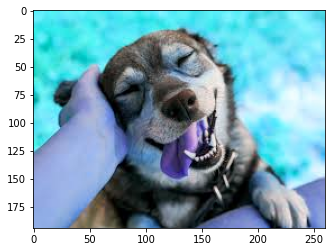

dog


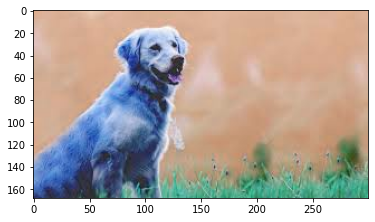

cat


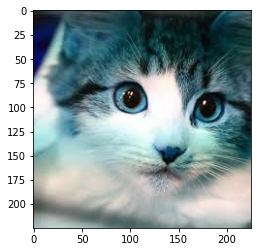

dog


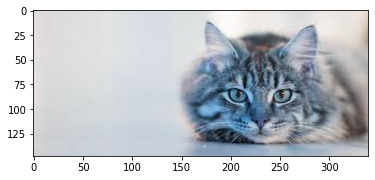

dog


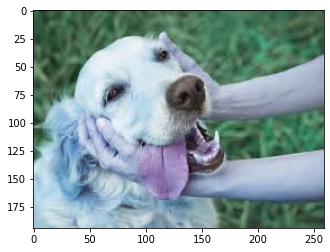

dog


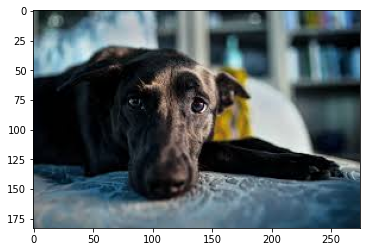

dog


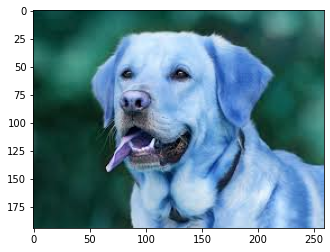

dog


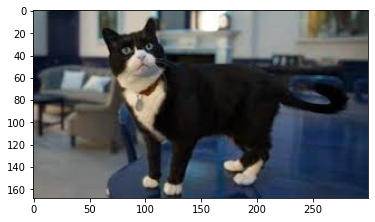

dog


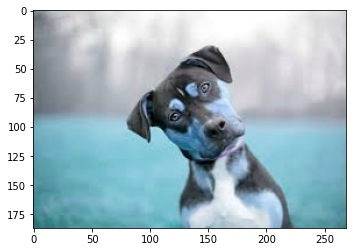

cat


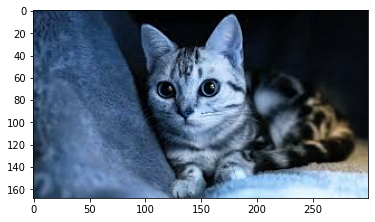

dog


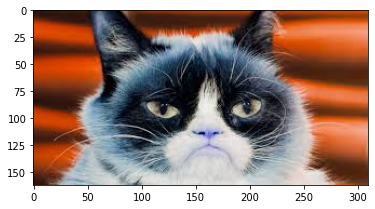

dog


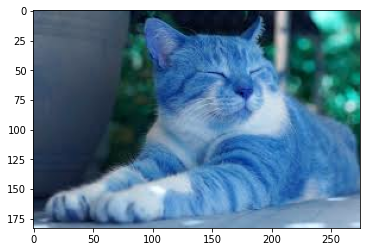

dog


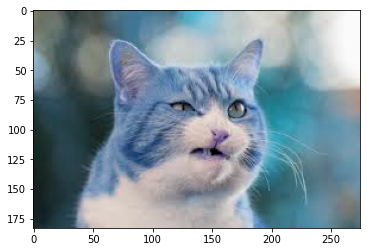

dog


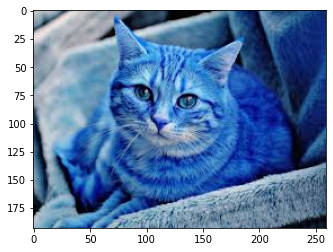

dog


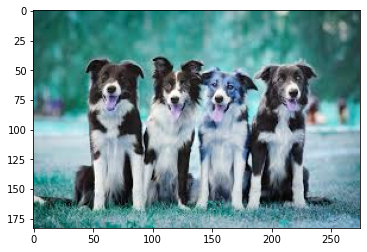

dog


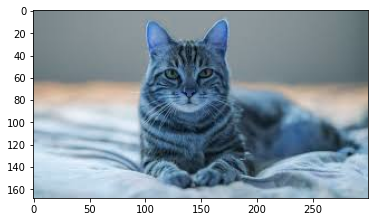

dog


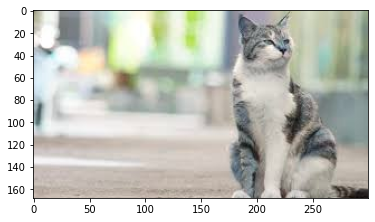

dog


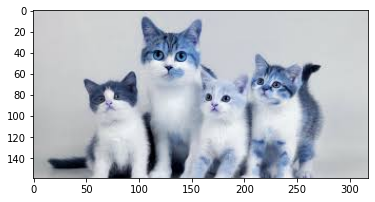

dog


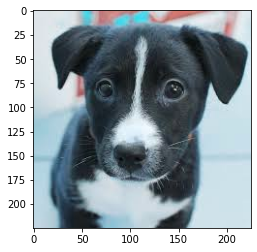

dog


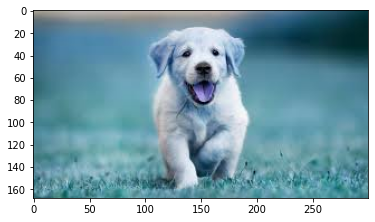

In [ ]:
lab = ["cat", "dog"]
dicc = '/content/data/'

for i in os.listdir(dicc):
   file_img = dicc + i
   def predictfile(file):
       size = 70
       image_arr = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
       new_arr = cv2.resize(image_arr, (size, size))
       return new_arr.reshape(-1, size, size, 1)

   prediction = model.predict(predictfile(file_img))
   print (lab[int(prediction[0][0])])
   plt.imshow(cv2.imread(file_img))
   plt.show()

   time.sleep(1)

# def predictfile(file):
#        size = 70
#        image_arr = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
#        new_arr = cv2.resize(image_arr, (size, size))
#        return new_arr.reshape(-1, size, size, 1)

# prediction = model.predict(predictfile('/content/kuc.jpg'))
# print (lab[int(prediction[0][0])])
# plt.imshow(cv2.imread('/content/kuc.jpg'))
# plt.show()